# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('./assignment_2.csv')
data.head()

# 상위 5개 데이터 표시하기

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

# 학습에 사용할 train set과 학습 성과를 시험한 test set으로 분리, 둘은 전체 데이터셋의 0.75:0.25으로 형성
# 데이터 분류할 때마다 랜덤으로 하게 되는데 이때 매번 데이터셋이 변경되는 것을 방지하고자 random_state을 특정 숫자로 고정

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# X_train에는 독립변수들이 있고 y_train에는 종속변수만 들어있음
# X_train의 데이터셋이 150개로 X_test의 3배임 (0.75 : 0.25)

((150, 3), (50, 3), (150,), (50,))

In [6]:
X_train

,bias,experience,salary
71,1,5.3,48000
124,1,8.1,66000
184,1,3.9,60000
97,1,0.2,45000
149,1,1.1,66000
...,...,...,...
67,1,6.7,64000
192,1,4.8,73000
117,1,7.0,86000
47,1,7.6,78000


In [7]:
y_train

71     1
124    1
184    1
97     0
149    0
      ..
67     1
192    0
117    0
47     0
172    0
Name: Label, Length: 150, dtype: int64

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [8]:
from sklearn.preprocessing import StandardScaler

# 평균을 0, 분산을 1로 갖는 정규분포로 맞춰주는 scaler
scaler = StandardScaler()

# bias 컬럼은 scaler의 영향을 받지 않도록 미리 빼놓고 추후에 concat 하기
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]

# data에 맞게 훈련(=fit)시키고 transform을 이용하여 값을 변환시키기
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

# bias 컬럼은 기존 데이터로 바꾸기
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [9]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]

# test set은 train set에서 훈련된 알고리즘에 의해 결과값이 도출되어야 하므로 새롭게 fit 하게 되면 정답 유출이 되는 꼴
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [10]:
# parameter 개수
N = len(X_train.loc[0])

In [11]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.61323275, 0.23470074, 0.29370585])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [44]:
parameters

array([0.1383921 , 0.26865664, 0.50002143])

In [12]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]
    return z

## Logistic Function

## $p = \frac{1}{1 + e^{-X_i \theta}}$

In [13]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1 / (1 + np.exp(-z))   
    return p

In [14]:
logistic(X_train.iloc[1], parameters)

0.7118526540673296

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\sum(y_ilogp(X_i)+(1-y_i)log(1-p(X_i)))$

In [15]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = -y * np.log(p) - (1-y) * np.log(1-p)
    return loss

In [16]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X, parameters)
    loss = (y - y_hat)**2 / 2
    return loss

In [17]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(np.array(X), y, parameters)
    loss = loss / n #loss 평균값으로 계산
    return loss

In [18]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.0319520497146473

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)= -\sum(y_i-\theta^TX_i)X_ij$
## ${\partial\over{\partial \theta_j}}l(p)= -\sum(y_i-p_i)x_{ij}$

In [19]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X, parameters)
        gradient = - (y - y_hat) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = (p - y) * X[j]
    return gradient

In [20]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.07897212092675102

In [21]:
from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

<IPython.core.display.Image object>

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [22]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(y_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [23]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[54.09895595785598, -3.277567161034804, 29.227833246620605]

## mini-batch
인덱스로 미니 배치 나누기

In [24]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: batch_idx 함수는 X_train의 데이터셋을 지정한 batch_size로 나누고, 나뉘어진 batch에 들어가있는 데이터의 인덱스를 리스트로 반환한다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [25]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n
    
    parameters -= gradients
    return parameters

In [26]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.60962616, 0.23491924, 0.29175733])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:  
- num_epoch:
<br>
BGD: 학습 한 번(1 iteration)에 모든 데이터셋을 이용해 기울기를 업데이트 
<br>
SGD: 학습 한 번(1 iteration)에 1개의 데이터를 이용해 기울기를 업데이트 
<br> 
MGD: 학습 한 번(1 iteration)에 데이터셋의 일부만 사용해 기울기를 업데이트  
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요 
<br> 
batch_size=1 -> SGD  
<br>
batch_size=k -> MGD
<br> 
batch_size=whole ->BGD  

In [27]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [28]:
new_param_bgd = gradient_descent(X_train, y_train, learning_rate=0.1, num_epoch=1000, batch_size=len(X_train))
new_param_bgd

epoch: 0  loss: 0.983491631215792  params: [0.65701474 0.3993958  0.57518839]  gradients: [0.03589907776296099, 0.004733367625379165, 0.026824833767379107]
epoch: 100  loss: 0.46282545512712925  params: [-0.79510663  0.8095351  -0.7229744 ]  gradients: [0.0042170084445347705, -0.006393080350996435, 0.006855874718549585]
epoch: 200  loss: 0.39619447705219096  params: [-1.02437536  1.35654932 -1.27343111]  gradients: [0.0013555548107713788, -0.004621816099370018, 0.0045323301166841625]
epoch: 300  loss: 0.3638748287104581  params: [-1.13207865  1.7548744  -1.66200903]  gradients: [0.000902204937476624, -0.0034517756662078, 0.0033525942698616664]
epoch: 400  loss: 0.3451048913770062  params: [-1.21276858  2.06011905 -1.95751157]  gradients: [0.0007296929368674575, -0.002712140568911544, 0.0026170009563245937]
epoch: 500  loss: 0.33312561716235173  params: [-1.27970574  2.30448842 -2.19266378]  gradients: [0.0006158285514371379, -0.002209778543308536, 0.002120681682715814]
epoch: 600  loss

array([-1.49926302,  3.06102367, -2.91250378])

In [29]:
new_param_sgd = gradient_descent(X_train, y_train)
new_param_sgd

epoch: 0  loss: 1.3626447518905147  params: [0.52066531 0.39580902 0.4430069 ]  gradients: [0.062075962473838564, 0.05598362278911153, 0.07128039289290468]
epoch: 100  loss: 0.19900093646857667  params: [-1.55731329  3.05759346 -3.00578211]  gradients: [0.007420251667017957, 0.010922514909354659, 0.014553729347034838]
epoch: 200  loss: 0.16825619711123985  params: [-1.77214706  3.74169949 -3.65170726]  gradients: [0.006973967850523131, 0.01056415348674088, 0.01307771118700171]
epoch: 300  loss: 0.15729925082305898  params: [-1.86758962  4.04029873 -3.93117041]  gradients: [0.00685597811108743, 0.010445415651232982, 0.012557375845723423]
epoch: 400  loss: 0.15227546396615857  params: [-1.91581265  4.19031377 -4.07103044]  gradients: [0.006809698886061076, 0.010392739604071489, 0.012319963481686694]
epoch: 500  loss: 0.14972551293454237  params: [-1.94152072  4.27008599 -4.14525899]  gradients: [0.006788113160724562, 0.010366418071035069, 0.012199740018914601]
epoch: 600  loss: 0.1483662

array([-1.97156424,  4.3631476 , -4.2317295 ])

In [30]:
new_param_mgd = gradient_descent(X_train, y_train, learning_rate=0.1)
new_param_mgd

epoch: 0  loss: 0.7666434439681445  params: [0.05100758 0.06251402 0.07889436]  gradients: [0.040249749367372294, 0.0361267298521965, 0.050580055168718996]
epoch: 100  loss: 0.19885069123672586  params: [-1.55821475  3.0605129  -3.00855587]  gradients: [0.0074177008964002, 0.010920693103299638, 0.014546473264895235]
epoch: 200  loss: 0.16821178058912126  params: [-1.77250993  3.74283961 -3.6527771 ]  gradients: [0.006973443177987769, 0.01056366155039951, 0.013075595019109031]
epoch: 300  loss: 0.15728025940577603  params: [-1.8677662   4.04084902 -3.9316841 ]  gradients: [0.006855793816629152, 0.010445214441835288, 0.012556476968357865]
epoch: 400  loss: 0.15226613237582895  params: [-1.91590515  4.19060107 -4.07129794]  gradients: [0.006809617551810131, 0.010392642776562482, 0.012319523177680721]
epoch: 500  loss: 0.1497206204095169  params: [-1.94157089  4.27024154 -4.14540363]  gradients: [0.006788072979067867, 0.010366367831702755, 0.012199509530214788]
epoch: 600  loss: 0.14836358

array([-1.97156699,  4.36315611, -4.23173741])

### Predict Label

In [31]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [32]:
from sklearn.metrics import *

In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]], dtype=int64)

In [34]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [35]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [36]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [37]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.83736821, 2.41539884])

In [38]:
#경사하강법
new_param = gradient_descent(X, y, model='linear')
new_param

epoch: 0  loss: 0.3113573238483423  params: [1.22709596 1.22903495]  gradients: [-0.023918127082439997, -0.018002735654610302]
epoch: 100  loss: 0.2715243001341477  params: [0.83202031 2.35214565]  gradients: [-0.013368322641162876, -0.0027657646281913557]
epoch: 200  loss: 0.27156324415707744  params: [0.83153178 2.35305883]  gradients: [-0.013378728936029814, -0.0027616253391065408]
epoch: 300  loss: 0.2715632784722821  params: [0.83153135 2.35305964]  gradients: [-0.013378738095157031, -0.002761621695900592]
epoch: 400  loss: 0.27156327850248474  params: [0.83153135 2.35305964]  gradients: [-0.013378738103218449, -0.0027616216926940143]
epoch: 500  loss: 0.271563278502511  params: [0.83153135 2.35305964]  gradients: [-0.013378738103225497, -0.0027616216926912313]
epoch: 600  loss: 0.271563278502511  params: [0.83153135 2.35305964]  gradients: [-0.013378738103225497, -0.0027616216926912313]
epoch: 700  loss: 0.271563278502511  params: [0.83153135 2.35305964]  gradients: [-0.013378738

array([0.83153135, 2.35305964])

In [39]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

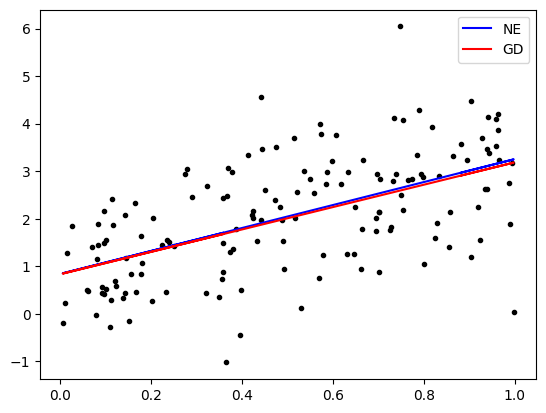

In [40]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()